In [1]:
# Load all neccessary libraries
from __future__ import absolute_import, division, print_function

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, constraints
from tensorflow.keras.utils import to_categorical

print(tf.__version__)

/home/lserra/python-virtual-environments/gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lserra/python-virtual-environments/gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lserra/python-virtual-environments/gpu/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lserra/pyt

1.14.0


/home/lserra/python-virtual-environments/gpu/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lserra/python-virtual-environments/gpu/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lserra/python-virtual-environments/gpu/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [2]:
# Import using pandas
links_dataframe = pd.read_csv('./Data/dataset52.csv')
links_dataframe.head()

,id,Date,Time,Time_num,GA0151:A_f10,GA0151:B_f10,GA0151:D_f10,GA0151:V_f10,GA0201:S_f10,GA0201:W_f10,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
0,373,2015-09-02,07:00,85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,374,2015-09-02,07:05,86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,375,2015-09-02,07:10,87,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,376,2015-09-02,07:15,88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,377,2015-09-02,07:20,89,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# check number of rows x columns
links_dataframe.shape

(82360, 1865)

In [4]:
# dropout labels which record very few congestions
#links_dataframe.drop(['GA3301:S_cp5', 'GA4101:G_cp5', 'GA4301:D_cp5', 'GA4551:V_cp5',
#                     'GA4771:T_cp5', 'GA5301:B_cp5', 'GG2051:T_cp5', 'GG210A:A_cp5'], 
#                     axis=1, inplace=True)
temp = links_dataframe.loc[:, 'GA5371:C_cp5']

#links_dataframe[[c for c in links_dataframe.columns if c[-3:] == 'cp5']]
labels = list(c for c in links_dataframe.columns if c[-3:] == 'cp5')
links_dataframe.drop(labels, axis=1, inplace=True)
links_dataframe = pd.concat([links_dataframe, temp], axis=1)
links_dataframe.shape



(82360, 1843)

In [4]:
# Detect missing values
links_dataframe.columns[links_dataframe.isnull().any()].tolist()

[]

# One-hot encoding Time_id

In [5]:
# filter numeric time
test_time = links_dataframe.loc[:,'Time_num']
test_time.describe()

count    82360.000000
mean       157.000000
std         41.857153
min         85.000000
25%        121.000000
50%        157.000000
75%        193.000000
max        229.000000
Name: Time_num, dtype: float64

In [6]:
# one hot encode
test_time = np.array(test_time)
time_encoded = to_categorical(test_time)
time_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
np.shape(time_encoded)

(82360, 230)

In [8]:
# header of one-hot time encoded
header = [f't_{i}' for i in range(230)]
header = np.array(header)
header = pd.DataFrame(columns=header)
header

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_220,t_221,t_222,t_223,t_224,t_225,t_226,t_227,t_228,t_229


In [9]:
# dataframe of encoded time
time_encoded = pd.DataFrame(time_encoded, columns=header.columns)
time_encoded.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_220,t_221,t_222,t_223,t_224,t_225,t_226,t_227,t_228,t_229
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# return to the original dataframe with Time_num encoded
df1 = links_dataframe.loc[:,'id':'Time_num']
df2 = links_dataframe.loc[:, 'GA0151:A_f10':]
links_dataframe = pd.concat([df1, time_encoded, df2], axis=1)
links_dataframe.head()

,id,Date,Time,Time_num,t_0,t_1,t_2,t_3,t_4,t_5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
0,373,2015-09-02,07:00,85,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,374,2015-09-02,07:05,86,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,375,2015-09-02,07:10,87,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,376,2015-09-02,07:15,88,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,377,2015-09-02,07:20,89,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Overall statistics
stats = links_dataframe.describe()
stats = stats.transpose()
stats.tail()

,count,mean,std,min,25%,50%,75%,max
GA5371:C_cp5,82360.0,27.732479,26.760375,-1.0,0.0,24.0,50.0,284.0
GA5401:V_cp5,82360.0,17.180464,16.842684,-1.0,0.0,14.0,28.0,182.0
GG2051:T_cp5,82360.0,1.179942,6.209555,-1.0,0.0,0.0,0.0,86.0
GG2051:W_cp5,82360.0,9.770665,16.770185,-1.0,0.0,0.0,13.0,84.0
GG210A:A_cp5,82360.0,-0.026676,0.275749,-1.0,0.0,0.0,0.0,44.0


In [12]:
# Filter rows with max = 0
stats_max_0 = stats[stats['max'] == 0]
stats_max_0.shape

(393, 8)

# Dropout columns which record only zero

In [13]:
# boolean dataframe with True if value > 0 
non_zeros = links_dataframe.loc[:, 't_0':] > 0
non_zeros.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# boolean Series with True if at least one value in a column is > 0  
col_non_zeros = (non_zeros != 0).any(axis=0)
col_non_zeros[0:5]

t_0    False
t_1    False
t_2    False
t_3    False
t_4    False
dtype: bool

In [15]:
# subset of the dataframe with features/targets which report at least one value > 0
df3 = links_dataframe.loc[:, 't_0':]
df3 = df3.loc[:, col_non_zeros]
df3.head()

,t_85,t_86,t_87,t_88,t_89,t_90,t_91,t_92,t_93,t_94,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# return to the original dataset without features/targets which record zero only
links_dataframe = pd.concat([df1, df3], axis=1)
links_dataframe.head()

,id,Date,Time,Time_num,t_85,t_86,t_87,t_88,t_89,t_90,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
0,373,2015-09-02,07:00,85,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,374,2015-09-02,07:05,86,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,375,2015-09-02,07:10,87,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,376,2015-09-02,07:15,88,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,377,2015-09-02,07:20,89,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# check number of rows x columns
links_dataframe.shape

(82360, 1702)

# Dropout examples which record only zero

In [18]:
# Series containing examples which record zero only
row_non_zeros = (links_dataframe.loc[:, 'GA0151:A_f10':] > 0).any(axis=1)
row_non_zeros.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [19]:
# subset of the original dataset without examples which record zero only
links_dataframe = links_dataframe.loc[row_non_zeros, :]
links_dataframe.head()

,id,Date,Time,Time_num,t_85,t_86,t_87,t_88,t_89,t_90,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
0,373,2015-09-02,07:00,85,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,374,2015-09-02,07:05,86,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,375,2015-09-02,07:10,87,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,376,2015-09-02,07:15,88,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,377,2015-09-02,07:20,89,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# check number of rows x columns
links_dataframe.shape

(80432, 1702)

# Split data into train set, validation set and test set 

In [21]:
# Set train set
train_dataset = links_dataframe[links_dataframe['id']<=246960]
train_dataset.tail()

,id,Date,Time,Time_num,t_85,t_86,t_87,t_88,t_89,t_90,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
69365,246956,2018-01-29,11:35,140,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,12,0
69366,246957,2018-01-29,11:40,141,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,8,0,0,12,0
69367,246958,2018-01-29,11:45,142,0.0,0.0,0.0,0.0,0.0,0.0,...,4,0,0,0,0,21,4,0,9,0
69368,246959,2018-01-29,11:50,143,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,4,0,45,38,0,1,0
69369,246960,2018-01-29,11:55,144,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,16,20,0,40,0


In [22]:
train_dataset.shape

(67629, 1702)

In [23]:
# randomize train set
train_dataset = train_dataset.reindex(np.random.permutation(train_dataset.index))
train_dataset.head()

,id,Date,Time,Time_num,t_85,t_86,t_87,t_88,t_89,t_90,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
16178,52008,2016-03-07,13:55,168,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
52653,182407,2017-06-07,08:30,103,0.0,0.0,0.0,0.0,0.0,0.0,...,36,37,0,42,0,40,44,0,0,0
13469,43990,2016-02-01,17:45,214,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
20446,64598,2016-04-20,07:05,86,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,2,0,0,9,0,0,0
48397,168965,2017-04-21,16:20,197,0.0,0.0,0.0,0.0,0.0,0.0,...,32,0,21,28,0,73,21,0,65,0


In [24]:
# Set validation set (10% of 2018 dataset)
validation_dataset= links_dataframe[(links_dataframe['id']>246960) 
                               & (links_dataframe['id']<=259861)]
validation_dataset.tail()

,id,Date,Time,Time_num,t_85,t_86,t_87,t_88,t_89,t_90,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
73656,259714,2018-03-14,18:45,226,0.0,0.0,0.0,0.0,0.0,0.0,...,0,12,0,14,26,24,9,0,0,0
73657,259715,2018-03-14,18:50,227,0.0,0.0,0.0,0.0,0.0,0.0,...,22,5,0,33,0,5,14,0,0,0
73658,259716,2018-03-14,18:55,228,0.0,0.0,0.0,0.0,0.0,0.0,...,9,10,0,29,0,1,2,0,0,0
73659,259717,2018-03-14,19:00,229,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,30,10,21,25,0,0,0
73660,259861,2018-03-15,07:00,85,1.0,0.0,0.0,0.0,0.0,0.0,...,20,5,0,10,0,13,20,0,0,0


In [25]:
# Set test set (last 20% of 2018 dataset)
#test_dataset = links_dataframe.drop(train_dataset.index)
test_dataset = links_dataframe[links_dataframe['id']>259861]
test_dataset.head()

,id,Date,Time,Time_num,t_85,t_86,t_87,t_88,t_89,t_90,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
73661,259862,2018-03-15,07:05,86,0.0,1.0,0.0,0.0,0.0,0.0,...,17,0,0,18,0,38,10,0,10,0
73662,259863,2018-03-15,07:10,87,0.0,0.0,1.0,0.0,0.0,0.0,...,8,0,0,8,0,16,17,0,0,0
73663,259864,2018-03-15,07:15,88,0.0,0.0,0.0,1.0,0.0,0.0,...,8,0,0,9,0,34,20,0,0,0
73664,259865,2018-03-15,07:20,89,0.0,0.0,0.0,0.0,1.0,0.0,...,8,6,0,9,0,10,21,0,0,0
73665,259866,2018-03-15,07:25,90,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,1,0,48,16,10,0,0


# Split features from labels

In [26]:
# Split training set labels
train_labels = train_dataset.filter(like='_cp5', axis=1)
train_features = train_dataset.drop(train_labels, axis=1)
train_features = train_features.drop(['id', 'Date', 'Time'], axis=1)
train_features.head()

,Time_num,t_85,t_86,t_87,t_88,t_89,t_90,t_91,t_92,t_93,...,GL1901:R_f0,GL1901:T_f0,GL1951:A_f0,GL1951:C_f0,GL1951:D_f0,GL1951:F_f0,GL2701:A_f0,GL2701:B_f0,GL285A:C_f0,GL285A:D_f0
16178,168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,28,7,13,29,24,0,0,0,0,0
52653,103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62,9,22,50,31,0,0,0,0,0
13469,214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43,9,35,40,37,0,0,0,0,0
20446,86,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,2,13,42,9,11,0,0,0,0
48397,197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40,18,22,36,41,6,0,0,0,0


In [27]:
# split train features for functional model
train_features1 = train_features.loc[:, 'Time_num']
train_features1 = pd.DataFrame(train_features1)

train_features2 = train_features.loc[:, 't_85':'t_229']

train_features3 = train_features.loc[:, 'GA0151:A_f10':]
len(train_features3.columns)

1530

In [28]:
# Check train labels' with max = 0
stats = train_labels.describe()
stats = stats.transpose()
stats
stats_max_0 = stats[stats['max'] == 0]
stats_max_0
len(stats_max_0)

0

In [29]:
#  Split validation set labels
validation_labels = validation_dataset.filter(like='_cp5', axis=1)
validation_features = validation_dataset.drop(validation_labels, axis=1)
validation_features.drop(['id', 'Date', 'Time'], axis=1, inplace=True)
validation_labels.head()

,GA3301:S_cp5,GA4101:B_cp5,GA4101:C_cp5,GA4101:G_cp5,GA4301:D_cp5,GA4551:S_cp5,GA4551:T_cp5,GA4551:V_cp5,GA4771:T_cp5,GA4801:A_cp5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
69370,0,0,0,0,0,0,0,0,0,0,...,0,6,0,4,0,16,32,0,22,0
69371,0,0,0,0,0,0,0,0,0,0,...,8,10,0,14,0,25,38,0,4,0
69372,0,0,0,0,0,0,0,0,0,0,...,10,13,0,1,0,28,28,0,1,0
69373,0,0,0,0,0,0,0,0,0,1,...,0,1,0,12,0,22,41,0,1,0
69374,0,0,0,0,0,0,0,0,0,1,...,0,2,4,4,0,17,20,0,0,0


In [30]:
# Check validation target columns with max = 0
stats = validation_labels.describe()
stats = stats.transpose()
stats_max_0 = stats[stats['max'] == 0]
len(stats_max_0)

3

In [31]:
# split validation features for functional model
validation_features1 = validation_features.loc[:, 'Time_num']
validation_features1 = pd.DataFrame(validation_features1)

validation_features2 = validation_features.loc[:, 't_85':'t_229']

validation_features3 = validation_features.loc[:, 'GA0151:A_f10':]
len(validation_features2.columns)

145

In [32]:
#  Split test set labels
test_labels = test_dataset.filter(like='_cp5', axis=1)
test_features = test_dataset.drop(test_labels, axis=1)
test_features.drop(['id', 'Date', 'Time'], axis=1, inplace=True)
test_labels.head()
test_labels.shape

(8536, 23)

In [33]:
# Check test target columns with max = 0
stats = test_labels.describe()
stats = stats.transpose()
stats_max_0 = stats[stats['max'] == 0]
len(stats_max_0)

3

In [34]:
# split test features for functional model
test_features1 = test_features.loc[:, 'Time_num']
test_features1 = pd.DataFrame(test_features1)

test_features2 = test_features.loc[:, 't_85':'t_229']

test_features3 = test_features.loc[:, 'GA0151:A_f10':]
len(test_features2.columns)

145

# Set the model for predictions

In [35]:
# define model for predictions
def build_model():
    
    Ninput_time = len(train_features1.columns)
    Ninput_oneHot = len(train_features2.columns)
    Ninput_flow = len(train_features3.columns)
    
    input_time = layers.Input(shape=(Ninput_time,))
    input_oneHot = layers.Input(shape=(Ninput_oneHot,))
    input_flow = layers.Input(shape=(Ninput_flow,))
    
    embedding = layers.Dense(24, activation=None)(input_oneHot)
    
    inputs = layers.concatenate([input_time, embedding, input_flow])
    hidden1 = layers.Dense(800, activation=tf.nn.relu)(inputs)
    hidden1Drop = layers.Dropout(0.5)(hidden1)
    hidden2 = layers.Dense(800, activation=tf.nn.relu)(hidden1)
    hidden2Drop = layers.Dropout(0.5)(hidden2)
    hidden3 = layers.Dense(800, activation=tf.nn.relu)(hidden2)
    hidden3Drop = layers.Dropout(0.5)(hidden3)
    
    output = layers.Dense(len(train_labels.columns))(hidden3Drop)
    
    model = keras.Model(inputs=[input_time, input_oneHot, input_flow], outputs=output)
    

    optimizer = tf.keras.optimizers.Adam(lr=0.00001)#, beta_1=0.9, beta_2=0.999, 
                                         #epsilon=None, decay=0.0, amsgrad=False)

    model.compile(loss='mse', 
                  optimizer=optimizer, 
                  metrics=['mae', 'mse'])
    return model

In [36]:
# summary of the chosen model
model = build_model()

# Restore the weights
#model.load_weights('./Weights/Functional/my_checkpoint')

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 145)]        0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 24)           3504        input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1530)]       0                     

In [37]:
# Try out the model 
#to see if it produced a result of the expected shape and size
example_batch1 = train_features1[:2]
example_batch2 = train_features2[:2]
example_batch3 = train_features3[:2]
example_result = model.predict([example_batch1, example_batch2, example_batch3])
print(example_result)

[[  7.40894      0.08923912  12.078641    11.466808     1.400727
  -21.825968    -2.6203606    4.6690927   -3.3765619   -5.5745606
   -8.477264     5.822258     5.086744     9.695088    -1.5835459
  -10.565269     2.7814362    2.0246077    2.8964763   16.976223
   15.245949    -5.3179445    0.6713705 ]
 [  9.518861    -5.55416     26.515703     9.0388       0.7990906
  -27.373053    -4.8010445    6.985467     3.869132   -11.566142
   -9.928371    10.940035     2.3332868   16.8441       0.7807636
  -19.025301    12.319578    -5.7064257    2.8837357   16.096157
   26.180477   -13.567476    -8.459123  ]]


# Train the model

In [38]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [39]:
# tests a training condition for every epoch and automatically stop the
# training if no improvement is achieved
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [40]:
# Train the model for 100 epochs, and record the training and validation accuracy in 
#the history object
EPOCHS = 100


history = model.fit([train_features1, train_features2, train_features3], 
                    train_labels, epochs=EPOCHS, batch_size=32, 
                    validation_data = ([validation_features1, validation_features2, 
                                        validation_features3], validation_labels),
                    verbose=2)#, callbacks=[early_stop])

Train on 67629 samples, validate on 4267 samples
Epoch 1/100
67629/67629 - 7s - loss: 100.5747 - mean_absolute_error: 5.6405 - mean_squared_error: 100.5746 - val_loss: 83.3941 - val_mean_absolute_error: 4.8905 - val_mean_squared_error: 83.3941
Epoch 2/100
67629/67629 - 7s - loss: 79.5294 - mean_absolute_error: 4.5103 - mean_squared_error: 79.5295 - val_loss: 83.2489 - val_mean_absolute_error: 4.5753 - val_mean_squared_error: 83.2489
Epoch 3/100
67629/67629 - 7s - loss: 74.8918 - mean_absolute_error: 4.2108 - mean_squared_error: 74.8918 - val_loss: 80.2610 - val_mean_absolute_error: 4.4840 - val_mean_squared_error: 80.2610
Epoch 4/100
67629/67629 - 7s - loss: 72.0421 - mean_absolute_error: 4.0184 - mean_squared_error: 72.0420 - val_loss: 79.1407 - val_mean_absolute_error: 4.4115 - val_mean_squared_error: 79.1407
Epoch 5/100
67629/67629 - 7s - loss: 70.0547 - mean_absolute_error: 3.8817 - mean_squared_error: 70.0547 - val_loss: 77.7483 - val_mean_absolute_error: 4.3761 - val_mean_squared

In [41]:
# Save the weights
model.save_weights('./Weights/Functional/my_checkpoint')

In [42]:
# print loss, mae and mse for all the epochs during the training of the model
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist
#hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
0,100.574670,5.640538,100.574593,83.394068,4.890528,83.394051,0
1,79.529418,4.510319,79.529457,83.248886,4.575347,83.248878,1
2,74.891813,4.210805,74.891754,80.261003,4.483987,80.260994,2
3,72.042081,4.018406,72.042030,79.140715,4.411452,79.140717,3
4,70.054677,3.881672,70.054657,77.748343,4.376062,77.748352,4
...,...,...,...,...,...,...,...
95,28.823229,2.299343,28.823227,89.949485,4.042783,89.949471,95
96,28.637678,2.294810,28.637667,90.409643,4.100058,90.409630,96
97,28.450588,2.287321,28.450611,90.706246,4.085550,90.706261,97
98,28.394085,2.278913,28.394096,90.409251,4.094109,90.409256,98


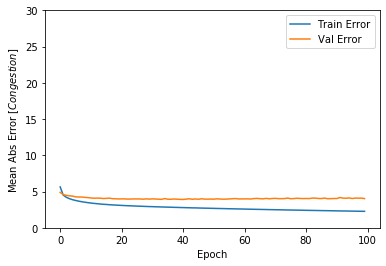

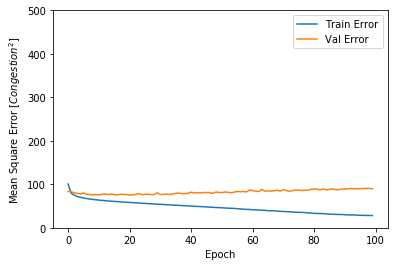

In [43]:
# plot global MAE and MSE
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [$Congestion$]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,30])
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$Congestion^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.ylim([0,500])

plot_history(history)

# Make predictions 

In [44]:
#Predict percentage of congestions using data in the training set
train_predictions = model.predict([train_features1, train_features2, train_features3])

train_predictions[train_predictions<0] = 0 #predictions below zero are set to zero

print(train_predictions[1])
train_predictions.shape

[0.0000000e+00 0.0000000e+00 7.6297805e-02 0.0000000e+00 0.0000000e+00
 3.9359830e-02 1.0948137e+00 1.5511856e-02 6.3234061e-02 6.2513226e-01
 1.7377589e+00 1.1269777e+00 8.0146804e-02 1.5664421e+01 1.0259694e+01
 2.6465507e+00 3.7464203e+01 2.1072497e+00 3.9602551e+01 2.8939953e+01
 7.3310571e+00 1.5010408e+01 4.4271071e-04]


(67629, 23)

In [45]:
#Predict percentage of congestions using data in the validation set
validation_predictions = model.predict([validation_features1, validation_features2, 
                                        validation_features3])

validation_predictions[validation_predictions<0] = 0 #predictions below zero are set to zero

print(validation_predictions[1])
validation_predictions.shape

[1.6645092e-01 0.0000000e+00 1.0360882e-01 6.6081643e-02 0.0000000e+00
 4.8076755e-01 7.6662779e-02 7.6568238e-03 2.2681270e-02 6.1641598e-01
 6.9504762e-01 4.4745195e-01 0.0000000e+00 8.1329937e+00 3.6328616e+00
 4.3176919e-02 6.3594246e+00 0.0000000e+00 2.0346693e+01 2.3634478e+01
 0.0000000e+00 1.1934302e+01 0.0000000e+00]


(4267, 23)

In [46]:
# write predictions on validation set to file 
val_pred_df = pd.DataFrame(validation_predictions, columns=validation_labels.columns, 
                           index=validation_labels.index)
val_pred_df.rename(columns = lambda x : str(x)[:-4], inplace=True)
val_pred_df = val_pred_df.round(3)
val_pred_df = pd.concat([validation_dataset.loc[:, 'Date':'Time'], val_pred_df], axis=1)
#val_pred_df.head()
val_pred_df.to_csv('./Results/validation_predictions.csv', index=False)

In [47]:
# write validation labels to file 
df = validation_labels.copy()
df.rename(columns = lambda x : str(x)[:-4], inplace=True)
df = pd.concat([validation_dataset.loc[:, 'Date':'Time'], df], axis=1)
#df.head()
df.to_csv('./Results/validation_labels.csv', index=False)

In [48]:
# write predictions on train set to file 
train_pred_df = pd.DataFrame(train_predictions, columns=train_labels.columns, 
                           index=train_labels.index)
train_pred_df.rename(columns = lambda x : str(x)[:-4], inplace=True)
train_pred_df = train_pred_df.round(3)
train_pred_df = pd.concat([train_dataset.loc[:, 'Date':'Time'], train_pred_df], axis=1)
#train_pred_df.head()
train_pred_df.to_csv('./Results/train_predictions.csv', index=False)

In [49]:
# write  train labels to file 
df = train_labels.copy()
df.rename(columns = lambda x : str(x)[:-4], inplace=True)
df = pd.concat([train_dataset.loc[:, 'Date':'Time'], df], axis=1)
#df.head()
df.to_csv('./Results/train_labels.csv', index=False)

In [50]:
def accuracy(predictions, targets):
    
  '''
  Args:
  predictions, numpy array
  targets, pandas DataFrame
  '''
  # Convert pandas DataFrame to a NumPy array
  targets = targets.to_numpy()
    
  l = np.abs(np.subtract(predictions, targets))
  l2 = np.square(l)
  
  mse = np.mean(l2)
  mae = np.mean(l) 
  return mse, mae

In [51]:
# print accuracy for train set
a = accuracy(train_predictions, train_labels)
print("Train set Mean Squared Error(MSE):{:5.1f}% congestion".format(a[0]))
print("Train set Mean Absolute Error(MAE):{:5.1f}% congestion".format(a[1]))

Train set Mean Squared Error(MSE): 24.2% congestion
Train set Mean Absolute Error(MAE):  2.0% congestion


In [52]:
# print accuracy for validation set
a = accuracy(validation_predictions, validation_labels)
print("Validation set Mean Squared Error(MSE):{:5.1f}% congestion".format(a[0]))
print("Validation set Mean Absolute Error(MAE):{:5.1f}% congestion".format(a[1]))

Validation set Mean Squared Error(MSE): 89.1% congestion
Validation set Mean Absolute Error(MAE):  3.9% congestion


In [53]:
# print scatter plot per example of choice
def example_scatter_plot(predictions, targets, index):
    
  '''
  Args:
  predictions, numpy array
  targets, pandas DataFrame
  '''
  # Convert pandas DataFrame to a NumPy array
  targets = targets.to_numpy()
  plt.scatter(targets[index], predictions[index])
  plt.xlabel('True Values [Congestions]')
  plt.ylabel('Predictions [Congestions]')
  plt.xlim([-2,plt.xlim()[1]])
  plt.ylim([-2,plt.ylim()[1]])
  scatter_plot = plt.plot([-100, 100], [-100, 100])

  print("True Congestions:", targets[index])
  print("Pred congestions:", np.around(predictions[index], decimals=1))

  return scatter_plot

True Congestions: [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  2  0  0  0  0  0  0]
Pred congestions: [ 0.2  0.   0.1  0.   0.   0.   0.1  0.   0.   0.4  0.3  0.1  0.1  6.1
  1.6  0.1  3.9  0.  13.5  8.1  0.6  2.3  0. ]


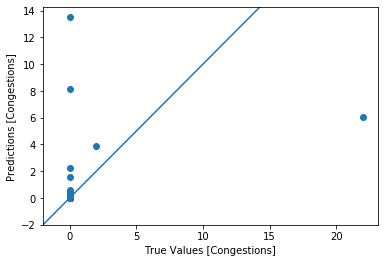

In [54]:
example_scatter_plot(validation_predictions, validation_labels, 3000)

In [55]:
# Determine matrix of MSE per Variance and per timestamp for targets
def mseVar_per_linkTime (predictions, labels, dataset):
    
  '''
  Args:
  predictions, numpy array
  labels, pandas DataFrame
  dataset, pandas DataFrame
  '''
  # Convert pandas DataFrame to a NumPy array
  labels_arr = labels.to_numpy()
    
  l2 = np.square(np.subtract(predictions, labels_arr))
  
  # determine MSE by label and by timestamp
  l2_dataframe = pd.DataFrame(l2, columns=labels.columns, index=labels.index) 
  test_time = dataset.filter(items=['Time'])
  l2_time = pd.concat([test_time, l2_dataframe], axis=1)
  l2_mean_by_time = l2_time.groupby('Time').mean()
  l2_mean_by_time.columns.name = 'SCOOT links'

  # determine variance by label and by timestamp
  labels_time = pd.concat([test_time, labels], axis=1)
  labels_time = labels_time.replace(-1, np.NaN)
  labels_var_by_time = labels_time.groupby('Time').var()

  # determine the quotient between mse and var per link and per timestamp
  l2_mean_by_time_arr = l2_mean_by_time.to_numpy()
  labels_var_by_time_arr = labels_var_by_time.to_numpy()
  
  mse_var_by_time_arr = np.divide(l2_mean_by_time_arr, labels_var_by_time_arr+0.0001)
  mse_var_by_time_df = pd.DataFrame(mse_var_by_time_arr, index=l2_mean_by_time.index,
                                    columns=l2_mean_by_time.columns)
  
  # print head of MSE/Var table and heatmap 
  plt.figure(figsize=(10, 16))
  ax = sns.heatmap(mse_var_by_time_df, vmin=0, vmax=5, center=1, cmap="YlGnBu")
  ax.set_title('Performance of traffic predictions', fontsize=14, fontweight='bold')

  display("MSE", l2_mean_by_time.head().round(3)) 
  display("Variance", labels_var_by_time.head().round(3)) 
  display("MSE by Variance", mse_var_by_time_df.head().round(1)) 

  return ax

# MSE per variance on train set

'MSE'

SCOOT links,GA3301:S_cp5,GA4101:B_cp5,GA4101:C_cp5,GA4101:G_cp5,GA4301:D_cp5,GA4551:S_cp5,GA4551:T_cp5,GA4551:V_cp5,GA4771:T_cp5,GA4801:A_cp5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
Time,,,,,,,,,,,,,,,,,,,,,
07:00,0.019,0.083,3.312,0.046,0.214,0.197,0.097,0.002,0.004,0.566,...,97.964,79.114,0.520,8.875,0.042,42.928,44.833,0.125,13.808,0.000
07:05,0.017,0.042,0.364,0.023,0.120,0.748,0.457,0.000,0.007,1.078,...,85.303,86.696,1.163,21.672,0.152,58.769,37.010,0.287,7.949,0.000
07:10,0.020,0.098,7.129,0.040,0.078,1.400,0.530,0.000,0.006,0.514,...,129.981,94.080,1.527,21.128,0.197,52.995,42.688,0.112,24.428,0.000
07:15,0.018,0.055,1.393,0.027,0.004,1.411,0.181,0.000,0.024,1.179,...,96.319,115.766,2.606,29.925,1.158,68.292,40.532,0.857,7.475,0.002
07:20,0.165,0.052,0.176,0.020,0.008,0.487,0.350,0.002,0.005,0.792,...,97.261,133.482,11.378,35.371,1.997,52.134,49.536,1.024,13.666,0.002


'Variance'

,GA3301:S_cp5,GA4101:B_cp5,GA4101:C_cp5,GA4101:G_cp5,GA4301:D_cp5,GA4551:S_cp5,GA4551:T_cp5,GA4551:V_cp5,GA4771:T_cp5,GA4801:A_cp5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
Time,,,,,,,,,,,,,,,,,,,,,
07:00,0.000,0.000,3.364,0.0,0.216,0.000,0.077,0.002,0.000,0.549,...,240.429,165.389,0.118,8.993,0.002,153.783,96.331,0.056,17.624,0.0
07:05,0.000,0.000,0.448,0.0,0.138,0.803,0.471,0.000,0.000,1.091,...,245.076,159.841,0.735,29.178,0.000,333.800,80.340,0.218,8.946,0.0
07:10,0.000,0.019,7.276,0.0,0.078,1.245,0.568,0.000,0.000,0.492,...,508.074,186.630,0.614,30.629,0.000,341.911,123.569,0.004,27.687,0.0
07:15,0.000,0.000,1.605,0.0,0.000,1.448,0.168,0.000,0.019,1.200,...,386.086,270.187,1.180,51.243,1.041,552.407,88.348,0.770,6.211,0.0
07:20,0.174,0.000,0.128,0.0,0.000,0.226,0.350,0.000,0.000,0.765,...,267.884,257.553,14.124,53.129,1.810,453.424,152.632,0.882,18.753,0.0


'MSE by Variance'

SCOOT links,GA3301:S_cp5,GA4101:B_cp5,GA4101:C_cp5,GA4101:G_cp5,GA4301:D_cp5,GA4551:S_cp5,GA4551:T_cp5,GA4551:V_cp5,GA4771:T_cp5,GA4801:A_cp5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
Time,,,,,,,,,,,,,,,,,,,,,
07:00,186.0,826.6,1.0,461.1,1.0,1966.9,1.3,1.0,37.6,1.0,...,0.4,0.5,4.4,1.0,18.5,0.3,0.5,2.2,0.8,0.1
07:05,166.7,417.4,0.8,234.9,0.9,0.9,1.0,0.3,68.5,1.0,...,0.3,0.5,1.6,0.7,1521.8,0.2,0.5,1.3,0.9,0.2
07:10,197.8,5.1,1.0,400.7,1.0,1.1,0.9,0.4,63.1,1.0,...,0.3,0.5,2.5,0.7,1974.7,0.2,0.3,25.4,0.9,0.3
07:15,180.7,553.8,0.9,267.3,37.3,1.0,1.1,0.4,1.2,1.0,...,0.2,0.4,2.2,0.6,1.1,0.1,0.5,1.1,1.2,21.8
07:20,1.0,524.2,1.4,203.6,82.3,2.2,1.0,21.9,53.7,1.0,...,0.4,0.5,0.8,0.7,1.1,0.1,0.3,1.2,0.7,21.6


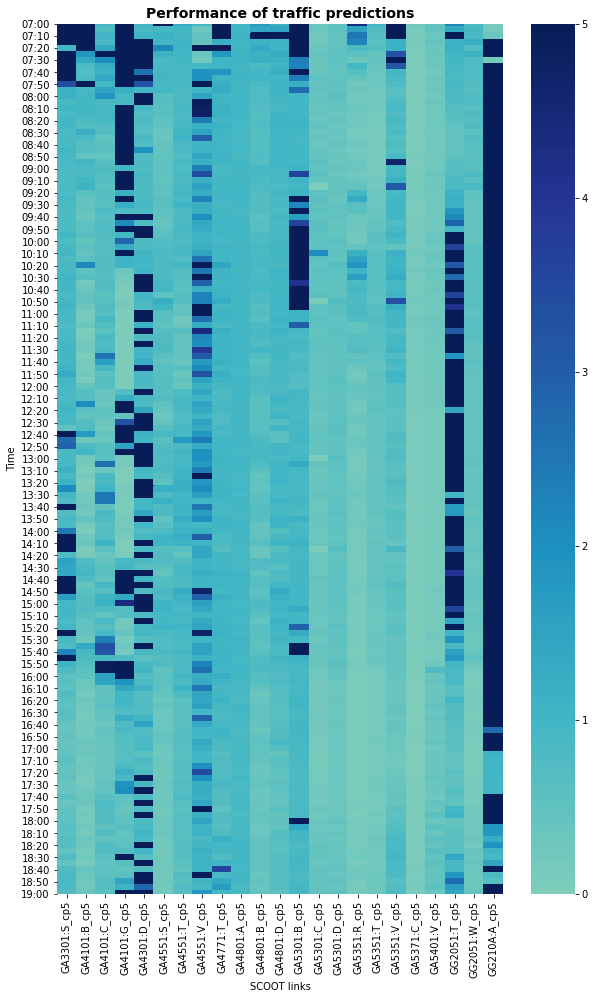

In [56]:
# matrix of MSE per Variance and per timestamp, for labels of train set
mseVar_per_linkTime(train_predictions, train_labels, train_dataset)

# MSE per variance on validation set

'MSE'

SCOOT links,GA3301:S_cp5,GA4101:B_cp5,GA4101:C_cp5,GA4101:G_cp5,GA4301:D_cp5,GA4551:S_cp5,GA4551:T_cp5,GA4551:V_cp5,GA4771:T_cp5,GA4801:A_cp5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
Time,,,,,,,,,,,,,,,,,,,,,
07:00,0.003,0.033,0.008,0.009,0.001,0.100,0.019,0.0,0.001,0.221,...,75.555,27.436,2.736,41.033,0.118,208.417,103.548,0.129,22.782,0.0
07:05,0.012,0.199,0.007,0.013,0.001,0.090,0.178,0.0,0.001,0.049,...,183.960,17.415,2.729,114.952,1.605,488.473,108.221,1.399,5.524,0.0
07:10,0.006,0.084,0.021,0.005,0.004,6.524,0.050,0.0,0.872,5.041,...,232.150,72.210,2.361,75.632,78.351,361.625,144.496,0.176,27.859,0.0
07:15,0.008,0.008,0.013,0.007,0.003,0.059,0.033,0.0,0.001,0.203,...,105.113,49.758,3.678,111.313,6.914,527.020,111.236,0.272,6.922,0.0
07:20,0.010,0.002,0.016,0.000,0.000,0.110,0.057,0.0,0.001,0.118,...,140.453,54.751,1.328,82.555,1.249,344.561,109.441,1.545,10.545,0.0


'Variance'

,GA3301:S_cp5,GA4101:B_cp5,GA4101:C_cp5,GA4101:G_cp5,GA4301:D_cp5,GA4551:S_cp5,GA4551:T_cp5,GA4551:V_cp5,GA4771:T_cp5,GA4801:A_cp5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
Time,,,,,,,,,,,,,,,,,,,,,
07:00,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.167,...,81.571,3.150,2.207,39.828,0.000,214.579,96.739,0.000,26.520,0.0
07:05,0.0,0.0,0.0,0.0,0.0,0.000,0.143,0.0,0.000,0.000,...,148.226,3.921,2.286,108.323,1.009,358.893,95.517,1.306,3.443,0.0
07:10,0.0,0.0,0.0,0.0,0.0,6.238,0.000,0.0,0.893,5.136,...,194.106,61.337,0.571,62.661,82.349,294.661,125.655,0.000,27.175,0.0
07:15,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.173,...,84.078,28.069,0.143,93.571,7.000,397.556,113.634,0.000,5.730,0.0
07:20,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.036,...,134.868,53.550,0.201,90.967,0.036,200.661,95.222,1.803,8.819,0.0


'MSE by Variance'

SCOOT links,GA3301:S_cp5,GA4101:B_cp5,GA4101:C_cp5,GA4101:G_cp5,GA4301:D_cp5,GA4551:S_cp5,GA4551:T_cp5,GA4551:V_cp5,GA4771:T_cp5,GA4801:A_cp5,...,GA5301:C_cp5,GA5301:D_cp5,GA5351:R_cp5,GA5351:T_cp5,GA5351:V_cp5,GA5371:C_cp5,GA5401:V_cp5,GG2051:T_cp5,GG2051:W_cp5,GG210A:A_cp5
Time,,,,,,,,,,,,,,,,,,,,,
07:00,27.7,325.1,81.8,90.1,6.5,1001.5,189.2,0.3,8.1,1.3,...,0.9,8.7,1.2,1.0,1175.6,1.0,1.1,1289.1,0.9,0.1
07:05,121.1,1987.6,67.8,131.9,5.1,897.4,1.2,0.4,10.3,492.5,...,1.2,4.4,1.2,1.1,1.6,1.4,1.1,1.1,1.6,0.2
07:10,58.2,835.2,209.1,53.8,41.5,1.0,497.5,0.8,1.0,1.0,...,1.2,1.2,4.1,1.2,1.0,1.2,1.1,1756.1,1.0,0.2
07:15,75.9,81.4,134.7,69.4,27.8,591.2,329.7,0.5,11.2,1.2,...,1.3,1.8,25.7,1.2,1.0,1.3,1.0,2722.3,1.2,0.1
07:20,104.5,19.6,157.5,2.3,2.1,1101.0,572.0,0.6,14.6,3.3,...,1.0,1.0,6.6,0.9,34.9,1.7,1.1,0.9,1.2,0.1


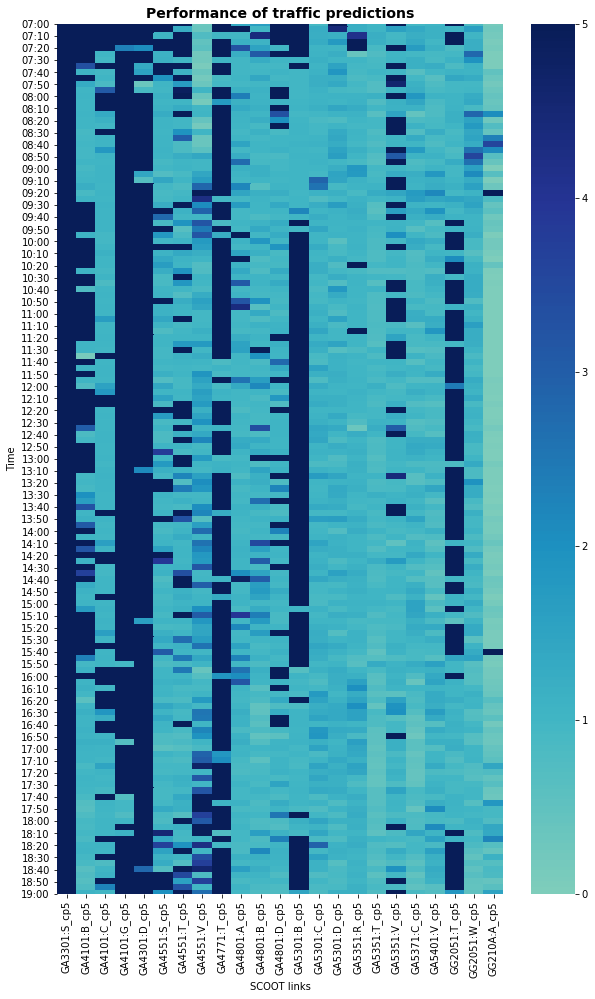

In [57]:
# matrix of MSE per Variance and per timestamp, for labels of validation set
mseVar_per_linkTime(validation_predictions, validation_labels, validation_dataset)